# Advanced Linear Regression

### Housing Prices Model

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# hide the warnings
import warnings
warnings.filterwarnings('ignore')

### Read CSV file

In [3]:
hp_df = pd.read_csv("train.csv")

In [4]:
hp_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
hp_df.shape

(1460, 81)

# Data Cleaning & Manipulation

In [7]:
# Check the null value in each columns
hp_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
#calulcate the percentage of null values
round(100*(hp_df.isnull().sum()/len(hp_df.index)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [9]:
#NA in Alley column means No Alley, so need replace it.
hp_df['Alley'].fillna('No Alley', inplace=True)

#NA in FireplaceQu column means No Fireplace, so need replace it.
hp_df['FireplaceQu'].fillna('No Fireplace', inplace=True)

#NA in PoolQC column means No Pool, so need replace it.
hp_df['PoolQC'].fillna('No Pool', inplace=True)

#NA in Fence column means No Fence, so need replace it.
hp_df['Fence'].fillna('No Fence', inplace=True) 


hp_df['BsmtQual'].fillna('No Basement', inplace=True)
hp_df['BsmtCond'].fillna('No Basement', inplace=True)
hp_df['BsmtExposure'].fillna('No Basement', inplace=True)
hp_df['BsmtFinType1'].fillna('No Basement', inplace=True)
hp_df['BsmtFinType2'].fillna('No Basement', inplace=True)

hp_df['GarageType'].fillna('No Garage', inplace=True)
hp_df['GarageFinish'].fillna('No Garage', inplace=True)
hp_df['GarageQual'].fillna('No Garage', inplace=True)
hp_df['GarageCond'].fillna('No Garage', inplace=True)

### We need to convert the year into age, For Ex -YearBuilt=2000 , Then YearBuilt_Age = 2020-2000 =19, 2020 is current year

In [10]:
hp_df['YearBuilt_Age']=2020 - hp_df['YearBuilt']
hp_df['YearRemodAdd_Age'] = 2020-hp_df['YearRemodAdd']
hp_df['GarageYrBlt_Age'] = 2020-hp_df['GarageYrBlt']
hp_df['YrSold_Age'] = 2020-hp_df['YrSold']

In [11]:
#drop original columns
hp_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns', inplace=True)

In [12]:
hp_df.drop(['Street','Utilities','MiscFeature'],axis='columns', inplace=True)

In [13]:
hp_df.shape

(1460, 78)

In [14]:
round(100*(hp_df['Alley'].value_counts()/hp_df['Alley'].count()))

No Alley    94.0
Grvl         3.0
Pave         3.0
Name: Alley, dtype: float64

In [15]:
round(100*(hp_df['BsmtCond'].value_counts()/hp_df['BsmtCond'].count()))

TA             90.0
Gd              4.0
Fa              3.0
No Basement     3.0
Po              0.0
Name: BsmtCond, dtype: float64

In [16]:
round(100*(hp_df['PoolQC'].value_counts()/hp_df['PoolQC'].count()))

No Pool    100.0
Gd           0.0
Fa           0.0
Ex           0.0
Name: PoolQC, dtype: float64

In [17]:
hp_df.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MoSold','BsmtCond'], axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

### Univariate Analysis

Let visualize each column in deep for better understanding

In [18]:
def unistats(df):
    output_df = pd.DataFrame(columns=['Count','Missing','NUnique','Unique','Dtype', 'Numeric','Mode','Mean','Min','25%','Median','75%','Max','Std', 'Skew', 'Kurt'])


    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].unique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]),
                                  df[col].mode().values[0], df[col].mean(), df[col].min(), df[col].quantile(0.25), df[col].median(), df[col].quantile(0.75),
                                  df[col].max(), df[col].std(),df[col].skew(), df[col].kurt()]
        else:
            output_df.loc[col] = [df[col].count(),df[col].isnull().sum(),df[col].nunique(), df[col].unique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]),
                                  df[col].mode().values[0],'','','','','','','','','']
    return output_df.sort_values(by=['Numeric','Skew', 'NUnique'], ascending=False)

In [19]:
unistats(hp_df)

,Count,Missing,NUnique,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
MiscVal,1460,0,21,"[0, 700, 350, 500, 400, 480, 450, 15500, 1200,...",int64,True,0,43.489,0,0,0,0,15500,496.123,24.4768,701.003
PoolArea,1460,0,8,"[0, 512, 648, 576, 555, 480, 519, 738]",int64,True,0,2.7589,0,0,0,0,738,40.1773,14.8284,223.268
LotArea,1460,0,1073,"[8450, 9600, 11250, 9550, 14260, 14115, 10084,...",int64,True,7200,10516.8,1300,7553.5,9478.5,11601.5,215245,9981.26,12.2077,203.243
3SsnPorch,1460,0,20,"[0, 320, 407, 130, 180, 168, 140, 508, 238, 24...",int64,True,0,3.40959,0,0,0,0,508,29.3173,10.3043,123.662
LowQualFinSF,1460,0,24,"[0, 360, 513, 234, 528, 572, 144, 392, 371, 39...",int64,True,0,5.84452,0,0,0,0,572,48.6231,9.01134,83.2348
KitchenAbvGr,1460,0,4,"[1, 2, 3, 0]",int64,True,1,1.04658,0,1,1,1,3,0.220338,4.4884,21.5324
BsmtFinSF2,1460,0,144,"[0, 32, 668, 486, 93, 491, 506, 712, 362, 41, ...",int64,True,0,46.5493,0,0,0,0,1474,161.319,4.25526,20.1133
ScreenPorch,1460,0,76,"[0, 176, 198, 291, 252, 99, 184, 168, 130, 142...",int64,True,0,15.061,0,0,0,0,480,55.7574,4.12221,18.4391
BsmtHalfBath,1460,0,3,"[0, 1, 2]",int64,True,0,0.0575342,0,0,0,0,2,0.238753,4.1034,16.3966
EnclosedPorch,1460,0,120,"[0, 272, 228, 205, 176, 87, 172, 102, 37, 144,...",int64,True,0,21.9541,0,0,0,0,552,61.1191,3.08987,10.4308


## Univariate Plot

In [20]:
def univaritePlot(df,col,vartype):
    if vartype==0:
        sns.set(style="darkgrid")
        fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
        ax[0].set_title(col.upper() + " DISTRIBUTION PLOT")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title(col.upper() + " BOX PLOT")
        sns.boxplot(data =df, x=col,ax=ax[1],orient='v')
        plt.show()
    if vartype==1:
        fig, ax = plt.subplots()
        fig.set_size_inches(len(df[col].unique())+10 , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index) 
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
            x = p.get_x() + p.get_width() / 2 - 0.05
            y = p.get_y() + p.get_height()
            ax.annotate(percentage, (x, y), size = 12)

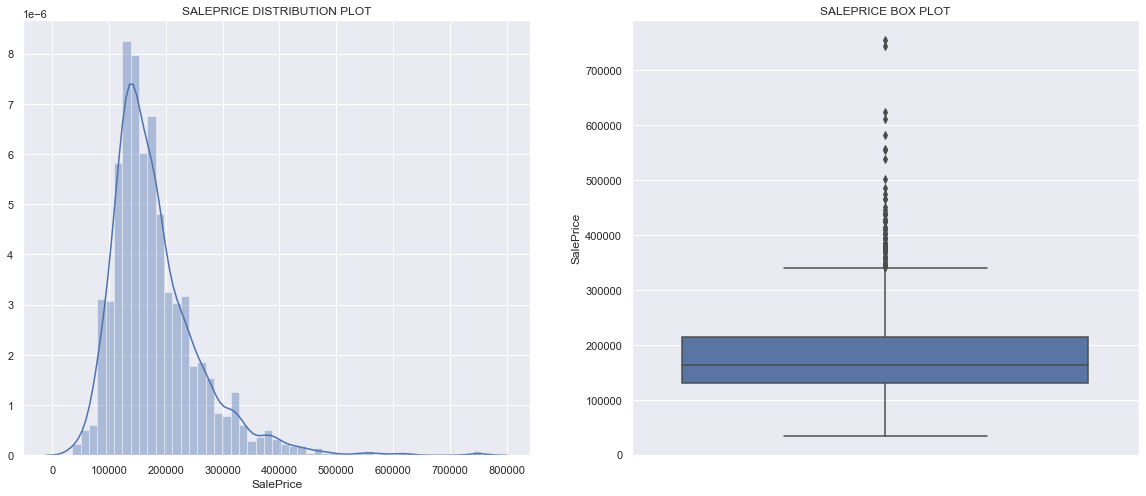

In [21]:
# Lets Visulize the target variable
univaritePlot(df=hp_df,col='SalePrice',vartype=0)

Insight: Most of the Sale Price are distributed between 14000 to 22000

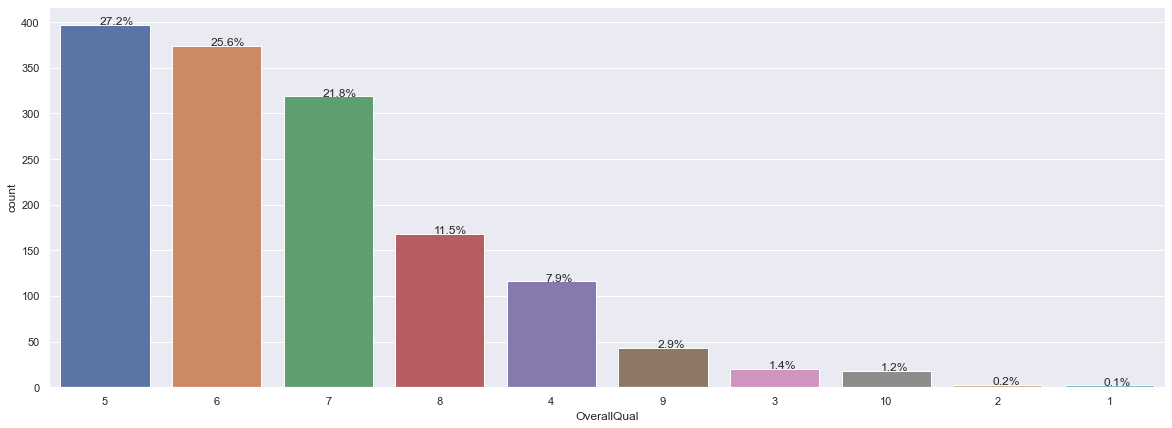

In [22]:
univaritePlot(df=hp_df,col='OverallQual',vartype=1)

Insight: Most of the Houses quality is rated 5 and 6

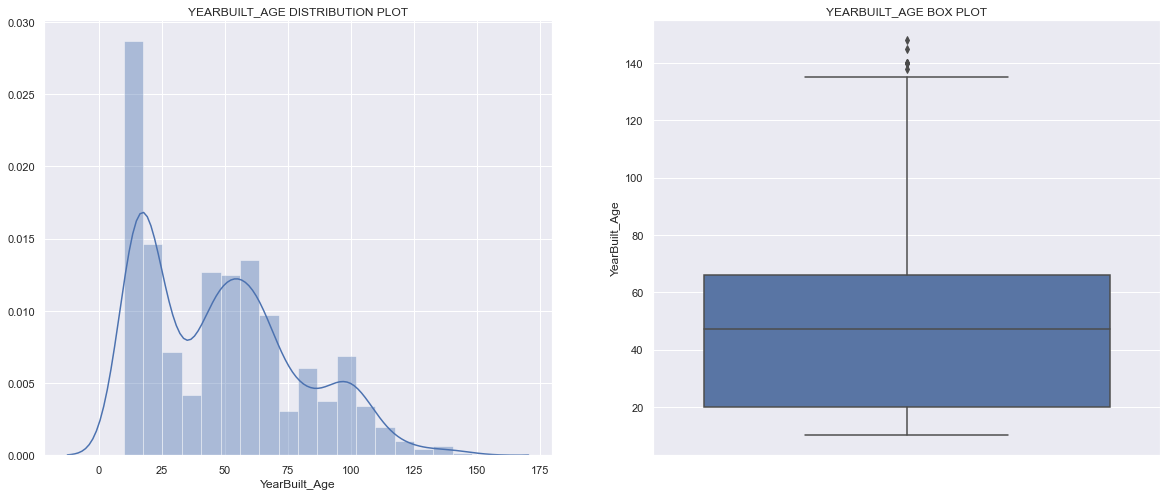

In [23]:
univaritePlot(df=hp_df,col='YearBuilt_Age',vartype=0)

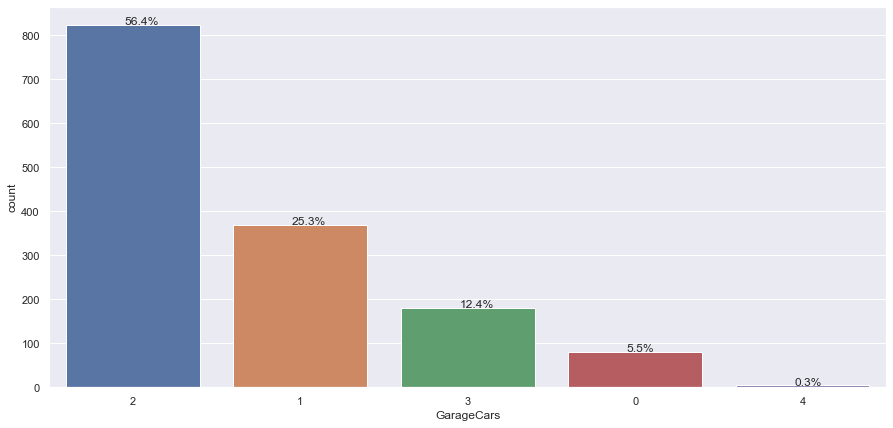

In [24]:
univaritePlot(df=hp_df,col='GarageCars',vartype=1)

Insight: Most of the size of garage of cars is 2

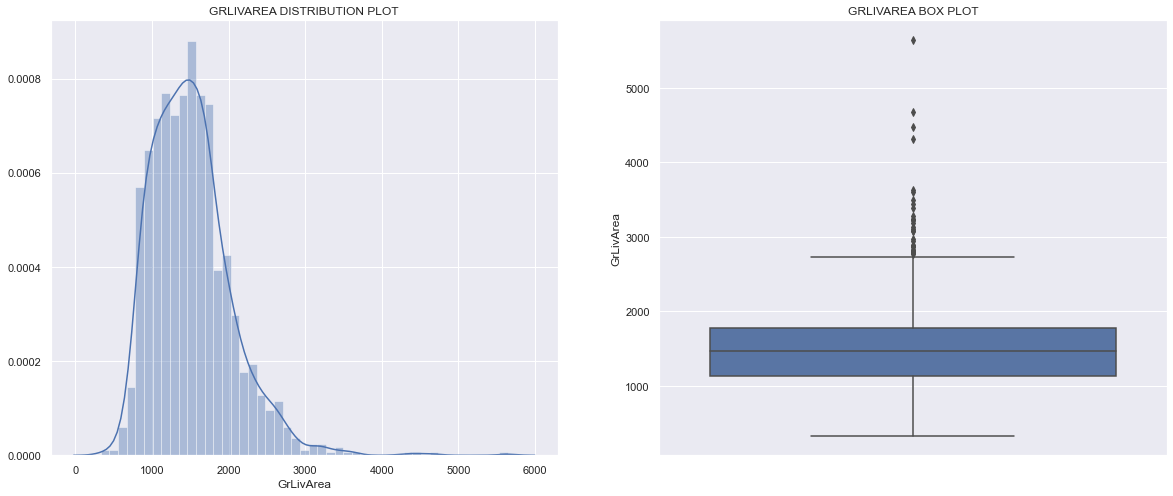

In [25]:
univaritePlot(df=hp_df,col='GrLivArea',vartype=0)

## Bivariate Analysis

In [26]:
def anova(df, feature, label):
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_labels = []
    for g in groups:
        g_list = df_grouped.get_group(g)
        group_labels.append(g_list[label])
        
    return stats.f_oneway(*group_labels)



def bivstats(df,label):
    output_df = pd.DataFrame(columns=['stat','+/-','Effect Size','pvalue'])
    
    for col in df:
        if not col == label:
            if df[col].isnull().sum() == 0:
                if pd.api.types.is_numeric_dtype(df[col]):
                    r, p = stats.pearsonr(df[label], df[col])
                    output_df.loc[col] = ['r',np.sign(r), abs(round(r,3)), round(p,100)]
                    
                else:
                    F, p = anova(df[[col, label]], col, label)
                    output_df.loc[col] = ['F','', abs(round(F,3)), round(p,100)]
            else:
                output_df.loc[col] = [np.nan, np.nan,np.nan,np.nan]
                
    return output_df.sort_values(['stat','Effect Size' ], ascending=False)

In [27]:
bivstats(hp_df, 'SalePrice')

,stat,+/-,Effect Size,pvalue
OverallQual,r,1,0.791,0.000000e+00
GrLivArea,r,1,0.709,0.000000e+00
GarageCars,r,1,0.640,0.000000e+00
GarageArea,r,1,0.623,0.000000e+00
TotalBsmtSF,r,1,0.614,0.000000e+00
1stFlrSF,r,1,0.606,0.000000e+00
FullBath,r,1,0.561,0.000000e+00
TotRmsAbvGrd,r,1,0.534,0.000000e+00
YearBuilt_Age,r,-1,0.523,0.000000e+00
YearRemodAdd_Age,r,-1,0.507,3.164900e-96


After the Analysis drop the columns which has not a good relation with saleprice and also have null values

In [28]:
hp_df.drop(['Id','MasVnrArea','GarageYrBlt_Age'], axis=1, inplace=True)

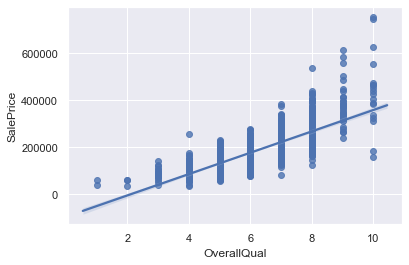

In [29]:
sns.regplot(x="OverallQual", y="SalePrice", data=hp_df)

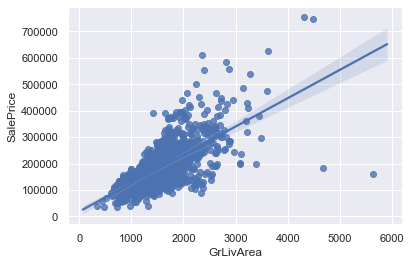

In [30]:
sns.regplot(x="GrLivArea", y="SalePrice", data=hp_df)

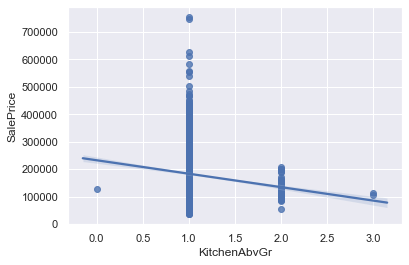

In [31]:
sns.regplot(x="KitchenAbvGr", y="SalePrice", data=hp_df)

In [32]:
hp_num = hp_df.select_dtypes(include=['float64', 'int64'])
hp_num.head()

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age
0,60,8450,7,5,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,17,17,12
1,20,9600,6,8,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500,44,44,13
2,60,11250,7,5,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500,19,18,12
3,70,9550,7,5,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000,105,50,14
4,60,14260,8,5,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000,20,20,12


In [33]:

corr = hp_num.corr()
corr

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age
MSSubClass,1.000000,-0.139781,0.032628,-0.059316,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.084284,-0.027850,-0.040581,0.021407
LotArea,-0.139781,1.000000,0.105806,-0.005636,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843,-0.014228,-0.013788,0.014261
OverallQual,0.032628,0.105806,1.000000,-0.091932,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.790982,-0.572323,-0.550684,0.027347
OverallCond,-0.059316,-0.005636,-0.091932,1.000000,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.077856,0.375983,-0.073741,-0.043950
BsmtFinSF1,-0.069836,0.214103,0.239666,-0.046231,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420,-0.249503,-0.128451,-0.014359
BsmtFinSF2,-0.065649,0.111170,-0.059119,0.040229,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378,0.049107,0.067759,-0.031706
BsmtUnfSF,-0.140759,-0.002618,0.308159,-0.136841,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479,-0.149040,-0.181133,0.041258
TotalBsmtSF,-0.238518,0.260833,0.537808,-0.171098,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581,-0.391452,-0.291066,0.014969
1stFlrSF,-0.251758,0.299475,0.476224,-0.144203,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852,-0.281986,-0.240379,0.013604
2ndFlrSF,0.307886,0.050986,0.295493,0.028942,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,-0.169494,-0.023855,0.421378,0.609707,0.502901,0.059306,0.616423,0.194561,0.183926,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334,-0.010308,-0.140024,0.028700


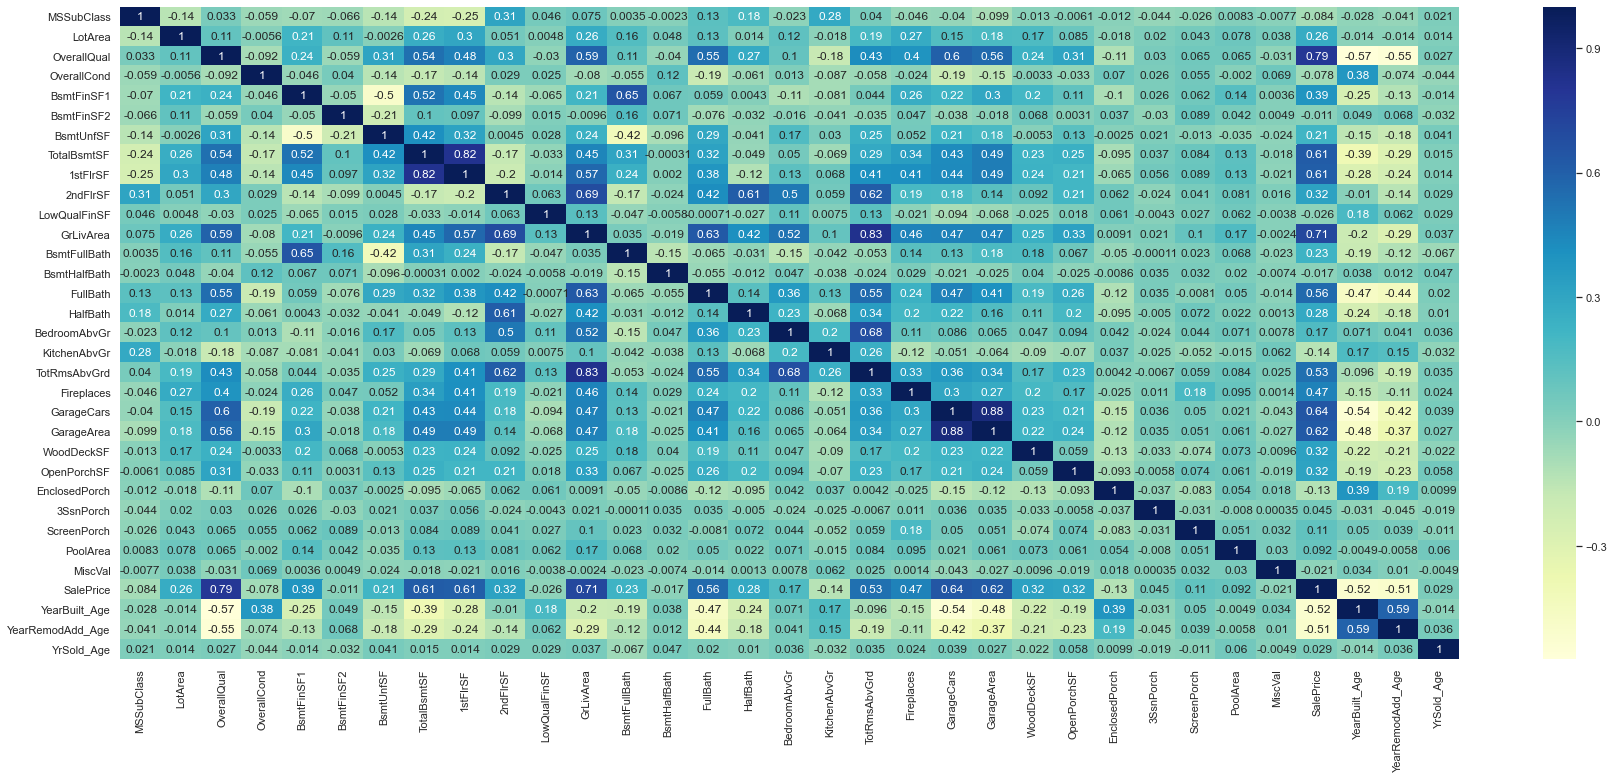

In [34]:
plt.figure(figsize=(30,12))
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

## Data Preparation

Do some encoding in the variables

In [35]:
hp_df['ExterCond'] = hp_df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
hp_df['LotShape'] = hp_df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
hp_df['LandSlope'] = hp_df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
hp_df['HeatingQC'] = hp_df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
hp_df['CentralAir'] = hp_df.CentralAir.map({'N':0,'Y':1})
hp_df['KitchenQual'] = hp_df.KitchenQual.map({'Fa':0,'TA':1,'Gd':2,'Ex':3})
hp_df['ExterQual'] = hp_df.ExterQual.map({'TA':0,'Fa':1,'Ex':2,'Gd':3})

hp_df['BsmtQual'] = hp_df.BsmtQual.map({'No Basement':0,'TA':1,'Gd':2,'Ex':3,'Fa':4})
hp_df['BsmtExposure'] = hp_df.BsmtExposure.map({'No Basement':0,'No':1,'Mn':2,'Av':3,'Gd':4})
hp_df['BsmtFinType1'] = hp_df.BsmtFinType1.map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
hp_df['BsmtFinType2'] = hp_df.BsmtFinType2.map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})

hp_df['GarageFinish'] = hp_df.GarageFinish.map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})
hp_df['GarageQual'] = hp_df.GarageQual.map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
hp_df['GarageCond'] = hp_df.GarageCond.map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})


Create dummy variables

In [36]:
dummy_col = pd.get_dummies(hp_df[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

hp_df = pd.concat([hp_df,dummy_col],axis='columns')

hp_df = hp_df.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

In [37]:
hp_df.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,3,0,7,5,3,2,2,1,6,706,1,0,150,856,4,1,856,854,0,1710,1,0,2,1,3,1,2,8,0,2,2,548,3,3,0,61,0,0,0,0,0,208500,17,17,12,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,3,0,6,8,0,2,2,4,5,978,1,0,284,1262,4,1,1262,0,0,1262,0,1,2,0,3,1,1,6,1,2,2,460,3,3,298,0,0,0,0,0,0,181500,44,44,13,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,11250,0,0,7,5,3,2,2,2,6,486,1,0,434,920,4,1,920,866,0,1786,1,0,2,1,3,1

Split the data into train and test sets.

In [38]:
df_train,df_test = train_test_split(hp_df,train_size=0.7,test_size=0.3,random_state=42)

Scaling the dataset

In [39]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [40]:
df_train.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,-0.868006,-0.031106,3,0,0.636468,0.391626,0,2,1,1,1,-0.971407,1,-0.280483,1.647353,0.546680,3,1,1.316609,-0.802940,-0.120373,0.287742,-0.814958,-0.247791,0.768438,-0.759102,0.134113,-0.212426,1,0.279381,0.594634,1,0.297954,0.254644,3,3,0.003763,-0.716106,-0.346561,-0.119377,-0.276042,-0.069227,-0.123048,-0.094307,50,50,12,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1452,2.885732,-0.624789,3,0,-0.822194,-0.508937,0,2,2,4,6,0.218347,1,-0.280483,-1.281026,-1.145636,3,1,-0.250050,-0.802940,-0.120373,-0.861096,1.111135,-0.247791,-1.068975,-0.759102,-1.099485,-0.212426,1,-0.947493,-0.942382,3,0.297954,0.230647,3,3,-0.740441,-0.311480,-0.346561,-0.119377,

In [41]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [42]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [43]:
X_train.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,-0.868006,-0.031106,3,0,0.636468,0.391626,0,2,1,1,1,-0.971407,1,-0.280483,1.647353,0.546680,3,1,1.316609,-0.802940,-0.120373,0.287742,-0.814958,-0.247791,0.768438,-0.759102,0.134113,-0.212426,1,0.279381,0.594634,1,0.297954,0.254644,3,3,0.003763,-0.716106,-0.346561,-0.119377,-0.276042,-0.069227,-0.123048,50,50,12,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1452,2.885732,-0.624789,3,0,-0.822194,-0.508937,0,2,2,4,6,0.218347,1,-0.280483,-1.281026,-1.145636,3,1,-0.250050,-0.802940,-0.120373,-0.861096,1.111135,-0.247791,-1.068975,-0.759102,-1.099485,-0.212426,1,-0.947493,-0.942382,3,0.297954,0.230647,3,3,-0.740441,-0.311480,-0.346561,-0.119377,-0.276042,-0.069227,

## Model Building and Evaluation

In [44]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,50)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=50, step=1, verbose=0)

In [45]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [46]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [47]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

### Lasso Regression

In [48]:
folds = KFold(n_splits=5,shuffle=True,random_state=42)

hyper_param = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [49]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023597,0.005012,0.001503,0.000094,0.0001,{'alpha': 0.0001},0.884280,0.539055,0.550246,0.302659,0.834657,0.622436,0.213604,6,0.878010,0.884249,0.886286,0.896227,0.879209,0.884796,0.006488
1,0.009676,0.002122,0.001484,0.000187,0.0010,{'alpha': 0.001},0.881419,0.815185,0.563326,0.676999,0.826266,0.752765,0.116184,1,0.833389,0.849344,0.880432,0.862471,0.826897,0.850507,0.019444
2,0.004852,0.000845,0.001474,0.000191,0.0100,{'alpha': 0.01},0.866768,0.807801,0.543707,0.682319,0.801618,0.740566,0.115182,2,0.774188,0.786937,0.832015,0.804982,0.762040,0.792032,0.024536
3,0.003653,0.000086,0.001236,0.000168,0.0500,{'alpha': 0.05},0.831122,0.765651,0.566178,0.640274,0.753522,0.711467,0.095105,3,0.730936,0.744293,0.797316,0.768192,0.716198,0.751387,0.028631
4,0.003868,0.000400,0.001324,0.000090,0.1000,{'alpha': 0.1},0.805789,0.739576,0.596639,0.623729,0.703730,0.694002,0.076313,4,0.708650,0.721939,0.767090,0.747251,0.691326,0.727251,0.027026


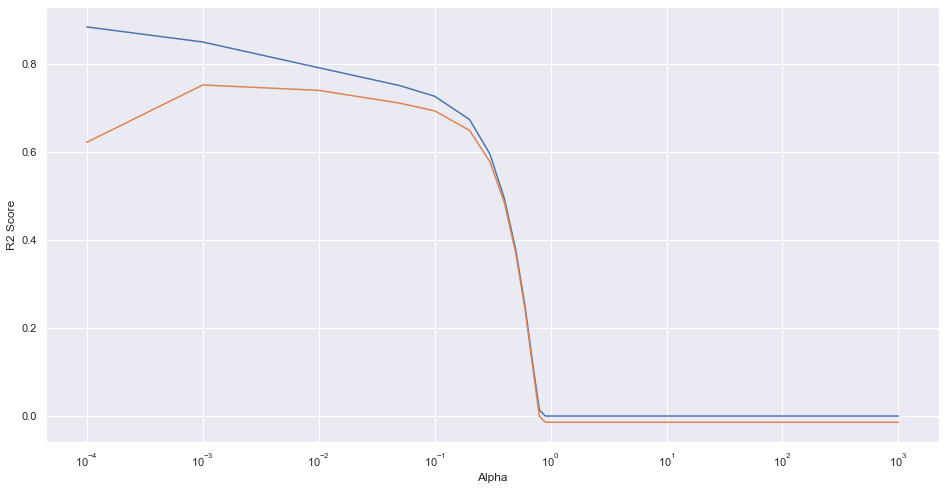

In [50]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [51]:

model_cv.best_params_


{'alpha': 0.001}

In [52]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8386812388751184
0.8585492210851494


In [53]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [54]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
29,TotRmsAbvGrd,1.108182
15,TotalBsmtSF,0.620453
34,GarageQual,0.589918
16,HeatingQC,0.554130
24,FullBath,0.553042
18,1stFlrSF,0.449437
28,KitchenQual,0.366216
12,BsmtFinType2,0.342960
27,KitchenAbvGr,0.336166
1,LotArea,0.311704


### Ridge

In [55]:
folds  = KFold(n_splits=5,shuffle=True,random_state=42)

hyper_param = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [56]:

cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004399,0.000968,0.001512,0.000119,0.0001,{'alpha': 0.0001},0.884129,0.479854,0.543058,0.232339,0.833103,0.594780,0.239956,28,0.878725,0.884818,0.886504,0.896752,0.880095,0.885379,0.006374
1,0.003170,0.000358,0.001287,0.000354,0.0010,{'alpha': 0.001},0.884268,0.485043,0.543097,0.238828,0.833238,0.597176,0.237565,27,0.878721,0.884816,0.886504,0.896749,0.880090,0.885376,0.006374
2,0.003176,0.000033,0.001341,0.000062,0.0100,{'alpha': 0.01},0.885387,0.531335,0.543475,0.296924,0.834372,0.618560,0.216604,26,0.878353,0.884564,0.886503,0.896476,0.879665,0.885112,0.006430
3,0.003107,0.000054,0.001213,0.000125,0.0500,{'alpha': 0.05},0.887164,0.657370,0.545075,0.458138,0.836912,0.677138,0.164629,25,0.873601,0.880989,0.886469,0.892651,0.874243,0.881591,0.007271
4,0.003272,0.000289,0.001325,0.000064,0.1000,{'alpha': 0.1},0.886979,0.729362,0.546905,0.554369,0.838220,0.711339,0.140716,23,0.866993,0.875467,0.886379,0.886833,0.866766,0.876487,0.008838


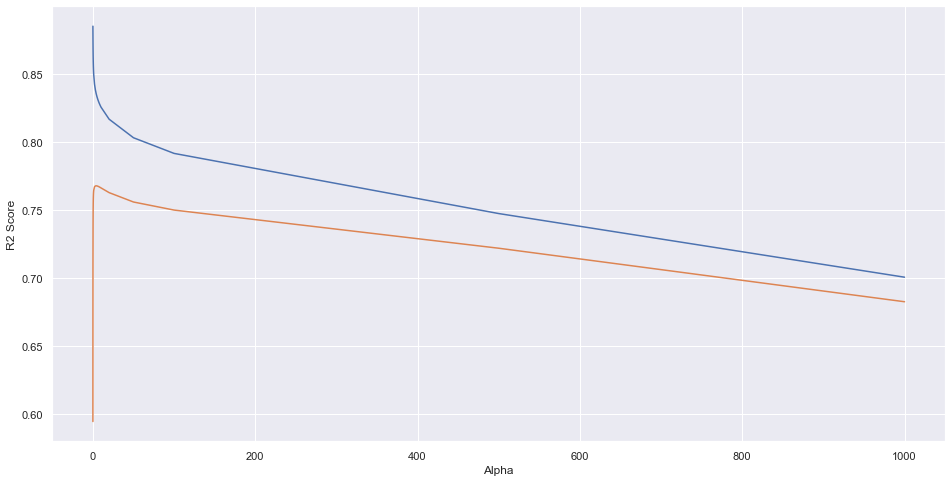

In [57]:

plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.show()

In [58]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 4.0}

In [59]:
ridge = Ridge(alpha = 4.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8325610266962402
0.8554963832883842


In [60]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [61]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
15,TotalBsmtSF,0.565852
29,TotRmsAbvGrd,0.559631
16,HeatingQC,0.508719
34,GarageQual,0.442326
18,1stFlrSF,0.414052
1,LotArea,0.313158
12,BsmtFinType2,0.302488
24,FullBath,0.297031
9,BsmtExposure,0.279519
49,MSZoning_RM,0.260347


## Final Model

In [62]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8386812388751184
0.8585492210851494


#### Best alpha value for Lasso :  0.001

#### Best alpha value for Ridge :  4